# Test Notebook

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Loading & Overview

1. Loading the data

In [2]:
dataFrame = pd.read_csv('../../Data/main/Telco-Customer-Churn.csv')
dataFrame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Checking dataset

In [3]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
for col in dataFrame.select_dtypes(include=['object']).columns:
    print(f"{col}: {dataFrame[col].unique()}\n")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']

Churn: ['No' 'Yes']



There is a couple of things to fix:

- Changing to TotalCharges to float

In [5]:
dataFrame['TotalCharges'] = pd.to_numeric(dataFrame['TotalCharges'], errors='coerce')

- Dropping customerID

In [6]:
dataFrame.drop(columns=['customerID'], inplace=True)

- Encoding categorical variables into numerical

In [7]:
simple_cats = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

complex_cats = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in complex_cats:
    dataFrame[col] = dataFrame[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Yes: 1, No: 0
for col in simple_cats:
    dataFrame[col] = dataFrame[col].map({'Yes': 1, 'No': 0})

for col in complex_cats:
    dataFrame[col] = dataFrame[col].map({'Yes': 1, 'No': 0})

dataFrame['gender'] = dataFrame['gender'].map({'Male': 1, 'Female': 0})

In [8]:
print(dataFrame.dtypes) 

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [9]:
# dataFrame = pd.get_dummies(dataFrame, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False)
dataFrame = pd.get_dummies(dataFrame, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [10]:
dataFrame.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


## EDA

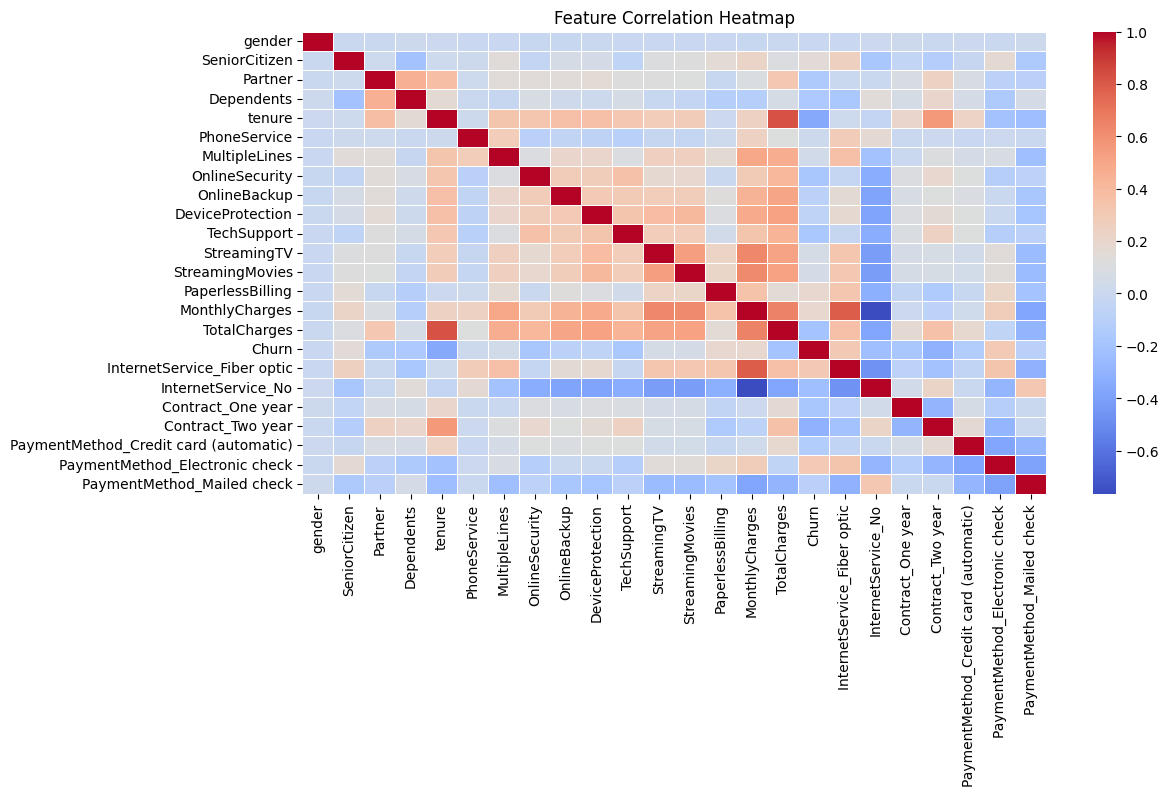

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(dataFrame.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

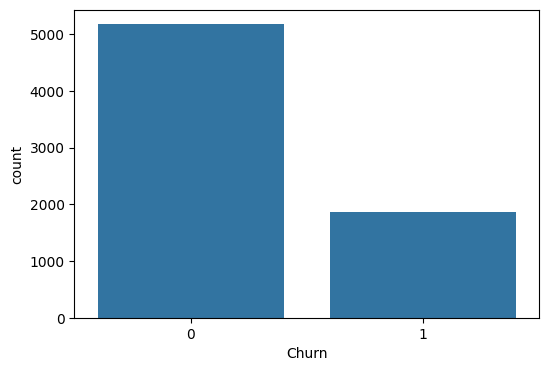

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=dataFrame)
plt.show()

## Clusterings

In [13]:
clustering_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_clustering = dataFrame[clustering_features]

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

In [16]:
# Find optimal k using the Elbow Method
inertia = []
K_range = range(1, 11)  # Test k values from 1 to 10

for k in K_range:
    kmeans = KMeans(k)
    kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

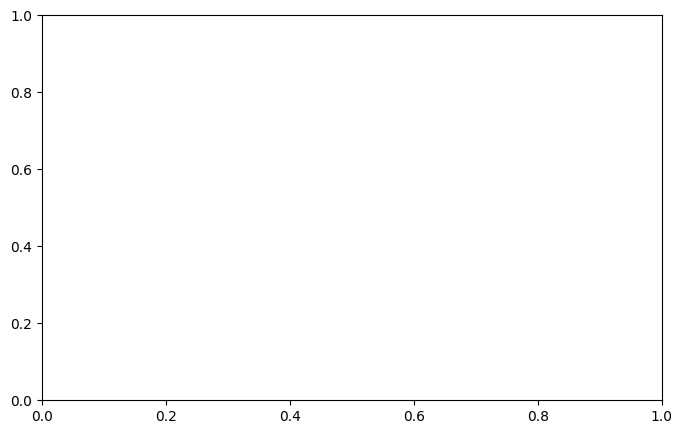

In [17]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='dashed')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()